<a href="https://colab.research.google.com/github/Hamim688/Hamim688/blob/main/Penugasan_Jobsheet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Praktikum D1

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Menampilkan 9 contoh gambar dari dataset MNIST:


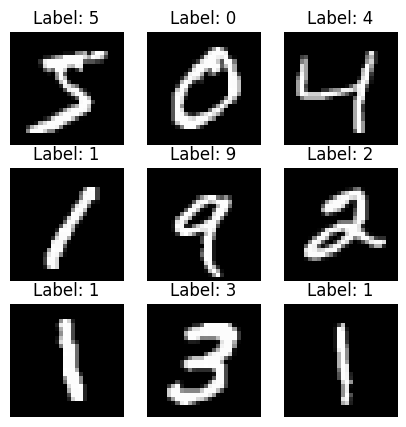

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# 1. Load data MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Tampilkan 9 contoh gambar pertama dari dataset training
print("Menampilkan 9 contoh gambar dari dataset MNIST:")
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# Tugas Kecil:
# Cobalah ganti range(9) dengan range(25) untuk menampilkan lebih banyak contoh.
# Apa yang Anda perhatikan dari bentuk tulisan tangan manusia? [cite: 167, 168]

Praktikum D2

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

# Load data (jika belum di-load sebelumnya)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 1. Flatten gambar dan normalisasi
# Mengubah matriks 28x28 menjadi vektor 784, dan normalisasi nilai pixel menjadi [0, 1]
nsamples, nx, ny = x_train.shape
x_train_flat = x_train.reshape((nsamples, nx * ny)) / 255.0

nsamples_test, nx_test, ny_test = x_test.shape
x_test_flat = x_test.reshape((nsamples_test, nx_test * ny_test)) / 255.0

# 2. Latih model SVM
# Menggunakan subset data (5000 sampel) karena SVM berat secara komputasi [cite: 197]
print("Melatih model SVM dengan 5000 data training...")
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])
print("Pelatihan selesai.")

# 3. Uji model pada data test
print("Menguji model pada data test...")
y_pred = clf.predict(x_test_flat)
akurasi = accuracy_score(y_test, y_pred)
print(f"Akurasi SVM (kernel=linear): {akurasi:.4f}")

# Tugas Kecil:
# Ubah kernel dari 'linear' menjadi 'rbf'. Bagaimana pengaruhnya terhadap akurasi? [cite: 202]
# Contoh: clf_rbf = svm.SVC(kernel='rbf', gamma='scale')

Melatih model SVM dengan 5000 data training...
Pelatihan selesai.
Menguji model pada data test...
Akurasi SVM (kernel=linear): 0.9101


Praktikum D3

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)


Melatih model CNN...
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8987 - loss: 0.3473 - val_accuracy: 0.9795 - val_loss: 0.0718
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9807 - loss: 0.0647 - val_accuracy: 0.9845 - val_loss: 0.0553
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9879 - loss: 0.0406 - val_accuracy: 0.9870 - val_loss: 0.0485
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9916 - loss: 0.0284 - val_accuracy: 0.9887 - val_loss: 0.0518
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9935 - loss: 0.0202 - val_accuracy: 0.9848 - val_loss: 0.0531
Pelatihan selesai.


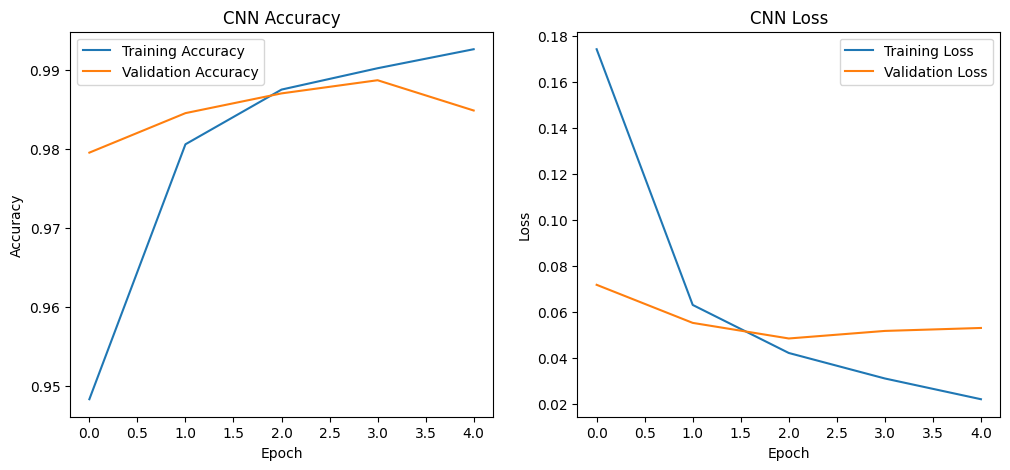

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load data (jika belum)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 1. Ubah bentuk data dan normalisasi untuk CNN
# CNN membutuhkan dimensi channel, jadi (28, 28) -> (28, 28, 1) [cite: 206]
x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

# 2. Bangun arsitektur model CNN [cite: 207]
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # 10 kelas untuk digit 0-9
])

model.summary()

# 3. Compile dan latih model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("\nMelatih model CNN...")
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)
print("Pelatihan selesai.")

# 4. Plot history akurasi dan loss
plt.figure(figsize=(12, 5))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Tugas Kecil:
# Tambahkan satu lapisan Conv2D lagi sebelum Flatten. Apakah akurasinya meningkat? [cite: 244]

Tugas

In [ ]:
# Import library yang dibutuhkan
from google.colab import files
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

# ===== 1) Upload file foto tulisan angka =====
print("Silakan upload file gambar angka tulisan tangan Anda (jpg/png):")
uploaded = files.upload() # Akan muncul tombol untuk memilih file

# ===== 2) Fungsi Preprocess agar mirip MNIST (28x28, putih-di-atas-hitam) =====
def preprocess_to_mnist_28x28(img_pil):
    # Konversi ke grayscale (hitam-putih)
    img = img_pil.convert('L')

    # Invert warna jika latar belakangnya terang (putih), agar jadi seperti MNIST
    # di mana angka berwarna putih dan latar belakang hitam.
    arr_check = np.array(img)
    if arr_check.mean() > 127:
        img = ImageOps.invert(img)

    # Crop gambar untuk membuang area kosong di sekeliling angka
    arr = np.array(img)
    mask = arr > np.mean(arr) * 0.8
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1 + 1, y1 + 1))

    # Resize gambar ke 20x20 dengan mempertahankan rasio
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)

    # Buat kanvas kosong 28x28 dan letakkan gambar angka di tengah
    w, h = img.size
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w) // 2, (28 - h) // 2))

    # Normalisasi nilai piksel ke rentang [0, 1] dan tambahkan dimensi channel
    arr = np.array(canvas).astype('float32') / 255.0
    arr = arr[..., None] # Menjadi (28, 28, 1)

    return canvas, arr

print("\nPre-processing gambar selesai!")

Silakan upload file gambar angka tulisan tangan Anda (jpg/png):


Saving 6.jpg to 6 (2).jpg
Saving 9.jpg to 9 (2).jpg
Saving 9V2.jpg to 9V2.jpg

Pre-processing gambar selesai!


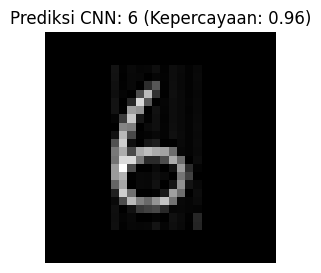

Hasil untuk file '6 (2).jpg':
-> Model CNN memprediksi angka ini sebagai: 6
-> Tingkat kepercayaan: 0.960


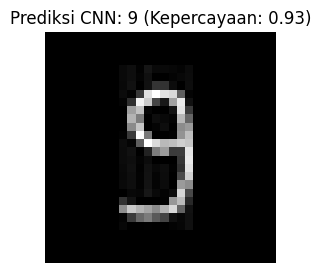

Hasil untuk file '9 (2).jpg':
-> Model CNN memprediksi angka ini sebagai: 9
-> Tingkat kepercayaan: 0.932


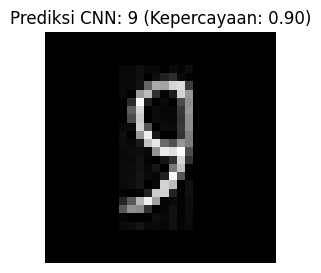

Hasil untuk file '9V2.jpg':
-> Model CNN memprediksi angka ini sebagai: 9
-> Tingkat kepercayaan: 0.904


In [ ]:
# Pastikan variabel 'model' dari praktikum D3 sudah ada
try:
    model
except NameError:
    print("Error: Variabel 'model' CNN tidak ditemukan. Jalankan dulu kode Praktikum D3!")
else:
    # Lakukan prediksi untuk setiap gambar yang di-upload
    for fname in uploaded.keys():
        img_pil = Image.open(fname)
        # Pre-process gambar
        disp_img, processed_arr = preprocess_to_mnist_28x28(img_pil)

        # Siapkan gambar untuk dimasukkan ke model CNN (butuh batch dimension)
        x_batch = np.expand_dims(processed_arr, axis=0)

        # Prediksi probabilitas untuk setiap kelas (0-9)
        probs = model.predict(x_batch, verbose=0)[0]
        prediksi = int(np.argmax(probs))
        kepercayaan = float(np.max(probs))

        # Tampilkan hasil prediksi
        plt.figure(figsize=(3, 3))
        plt.imshow(disp_img, cmap='gray')
        plt.title(f"Prediksi CNN: {prediksi} (Kepercayaan: {kepercayaan:.2f})")
        plt.axis('off')
        plt.show()

        print(f"Hasil untuk file '{fname}':")
        print(f"-> Model CNN memprediksi angka ini sebagai: {prediksi}")
        print(f"-> Tingkat kepercayaan: {kepercayaan:.3f}")

coba pakai SVM

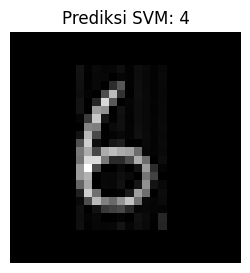

Hasil untuk file '6 (1).jpg':
-> Model SVM memprediksi angka ini sebagai: 4


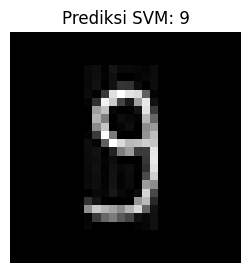

Hasil untuk file '9 (1).jpg':
-> Model SVM memprediksi angka ini sebagai: 9


In [ ]:
# Pastikan variabel 'clf' dari praktikum D2 sudah ada
try:
    clf
except NameError:
    print("Error: Variabel 'clf' SVM tidak ditemukan. Jalankan dulu kode Praktikum D2!")
else:
    # Lakukan prediksi untuk setiap gambar yang di-upload
    for fname in uploaded.keys():
        img_pil = Image.open(fname)
        # Pre-process gambar
        disp_img, processed_arr = preprocess_to_mnist_28x28(img_pil)

        # Siapkan gambar untuk model SVM (butuh diratakan/flatten menjadi vektor 784)
        x_flat = processed_arr.reshape(1, -1)

        # Prediksi dengan model SVM
        prediksi = int(clf.predict(x_flat)[0])

        # Tampilkan hasil
        plt.figure(figsize=(3, 3))
        plt.imshow(disp_img, cmap='gray')
        plt.title(f"Prediksi SVM: {prediksi}")
        plt.axis('off')
        plt.show()

        print(f"Hasil untuk file '{fname}':")
        print(f"-> Model SVM memprediksi angka ini sebagai: {prediksi}")